# パス解析

モデルのすべての変数が観測変数であり、複数の説明変数から複数の目的変数を説明するようなモデル。

## 逐次モデル

逐次モデルは内生変数間の双方向のパスが無いモデル

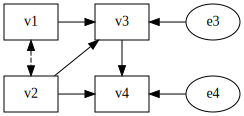

In [95]:
import graphviz

graphviz.Source("""
digraph g {
    graph [rankdir = LR];
    node [shape = rectangle];
    v1 -> v3
    v2 -> v3 -> v4
    v2 -> v4

    v1 -> v2 [dir=both style=dashed label=" "]
    { rank = same; v1; v2 }
    { rank = same; v3; v4 }

    node [shape = ellipse]
    e3 -> v3
    e4 -> v4
    { rank = max; e3; e4 }
}
""")

この図のモデルは

$$
v_3 = a_{31} v_1 + a_{32} v_2 + e_3\\
v_4 = a_{42} v_2 + a_{43} v_3 + e_4
$$

という同時方程式（構造方程式）を解くことになる。

行列形式で

$$
\newcommand{\b}[1]{\boldsymbol{#1}}
\b{v} = \b{A v} + \b{e}
$$


のような形で書くと次のようになる。

$$
\begin{bmatrix}
v_1 \\ v_2 \\ v_3 \\ v_4
\end{bmatrix}
=
\begin{bmatrix}
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
a_{31} & a_{32} & 0 & 0\\
0 & a_{42} & a_{43} & 0\\
\end{bmatrix}
\begin{bmatrix}
v_1 \\ v_2 \\ v_3 \\ v_4
\end{bmatrix}
+
\begin{bmatrix}
v_1 \\ v_2 \\ e_3 \\ e_4
\end{bmatrix}
$$

構造方程式には次のような性質がある

:::{admonition} 構造方程式の性質

- $\b{A}$の対角成分は常に0
- $v_i$が外生変数であれば、$\b{A}$の$i$行はゼロベクトル$\b{o}^T$である
- $v_i$が外生変数であれば、残差ベクトルの要素$e_i$は観測値$v_i$になる

:::

### 共分散の構造化

観測変数の共分散$\b{\Sigma}$は

$$
\b{\Sigma}
= E[\b{v}\b{v}^T]
=
\begin{bmatrix}
E[v^2_1]\\
E[v_2 v_1] & E[v_2^2]\\
E[v_3 v_1] & E[v_3 v_2] & E[v_3^2]\\
E[v_4 v_1] & E[v_4 v_2] & E[v_4 v_3] & E[v_4^2]
\end{bmatrix}
$$


で、これらの各要素は

$$
\begin{align}
E[v_3 v_1] &= E[(a_{31} v_1 + a_{32} v_2 + e_3) v_1]\\
&= a_{31} E[v_1^2] + a_{32} E[v_1 v_2] + E[e_3 v_1]\\
&= a_{31} \sigma^2_1 + a_{32} \sigma_{12}
\end{align}
$$

$$
\begin{align}
E[v_3 v_2] &= E[(a_{31} v_1 + a_{32} v_2 + e_3) v_2]\\
&= a_{31} \sigma_{12} + a_{32} \sigma^2_2
\end{align}
$$

$$
\begin{align}
E[v_3 v_3]
&= E[(a_{31} v_1 + a_{32} v_2 + e_3)^2]\\
&= E[(a_{31} v_1 + a_{32} v_2 + e_3)(a_{31} v_1 + a_{32} v_2 + e_3)]\\
&= E[
    (a_{31} v_1)^2
    + 2 (a_{31} v_1) (a_{32} v_2)
    + (a_{31} v_1) e_3
    + (a_{32} v_2)^2
    + (a_{32} v_2) e_3
    + (a_{31} v_1) e_3
    + (a_{32} v_2) e_3
    + e_3^2
]\\
&= a_{31}^2 E[v_1^2]
    + 2 a_{31} a_{32} E[v_1 v_2]
    + a_{32}^2 E[v_2^2]
    + E[e_3^2]
\\
&= a_{31}^2 \sigma^2_2
    + 2 a_{31} a_{32} \sigma_{12}
    + a_{32}^2 \sigma^2_2
    + \sigma^2_{e3}
\end{align}
$$


$$
\begin{align}
E[v_4 v_1] &= E[(a_{42} v_2 + a_{43} v_3 + e_4) v_1]\\
&= a_{42} \sigma_{21} + a_{43} \sigma_{31}
\end{align}
$$

$$
\begin{align}
E[v_4 v_2] &= E[(a_{42} v_2 + a_{43} v_3 + e_4) v_2]\\
&= a_{42} \sigma^2_2 + a_{43} \sigma_{32}
\end{align}
$$

$$
\begin{align}
E[v_4 v_3]
&= E[(a_{42} v_2 + a_{43} v_3 + e_4)
     (a_{31} v_1 + a_{32} v_2 + e_3)]\\
&= a_{42} a_{31} \sigma_{21}
   + a_{42} a_{32} \sigma^2_2
   + a_{43} a_{31} \sigma_{31}
   + a_{43} a_{32} \sigma_{32}
\end{align}
$$


のような形で、母数によって説明される形になっている。

### 行列を用いた共分散の構造化

これを行列を用いて表記すると、

$$
\b{v} = \b{Av} + \b{e}
$$

の式を

$$
\begin{align}
\b{I v} &= \b{A v} + \b{e}\\
(\b{I} - \b{A})\b{v} &= \b{e}
\end{align}
$$

と変形し、$(\b{I} - \b{A})$に逆行列が存在することを仮定して

$$
\b{T} = (\b{I} - \b{A})^{-1}
$$

とおけば、構造方程式は

$$
\b{v} = \b{T e}
$$

と簡潔に表記できる。

観測変数の共分散構造は

$$
\begin{align}
\b{\Sigma}
&= E[\b{v v}^T]
= E[\b{Te}(\b{Te})^T]
= E[\b{Te}\b{e}^T \b{T}^T]
= \b{T} E[\b{ee}^T] \b{T}^T\\
&= \b{T \Sigma_e T}^T
\end{align}
$$

となる。

残差ベクトル$\b{e}$の共分散行列$\b{\Sigma}_{\b{e}}$は

$$
\b{\Sigma_e}
=
\begin{bmatrix}
E[v^2_1]\\
E[v_2 v_1] & E[v_2^2]\\
E[e_3 v_1] & E[e_4 v_2] & E[e_3^2]\\
E[e_4 v_1] & E[e_4 v_2] & E[e_4 e_3] & E[e_4^2]
\end{bmatrix}
=
\begin{bmatrix}
\sigma^2_1\\
\sigma_{21} & \sigma^2_2\\
0 & 0 & \sigma^2_{e3}\\
0 & 0 & 0 & \sigma^2_{e4}
\end{bmatrix}
$$

となり、共分散構造は$\b{A}$と$\b{\Sigma_e}$が特定されれば一意に定まることがわかる。

### データを使って推定

In [112]:
import numpy as np
import pandas as pd

# データ生成
n = 1000
np.random.seed(0)
A = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [3, 2, 0, 0],
    [0, 5, 4, 0],
])
v1 = np.random.uniform(size=n)
v2 = np.random.uniform(size=n)
e3 = np.random.normal(size=n)
e4 = np.random.normal(size=n)
v3 = A[2, 0] * v1 + A[2, 1] * v2 + e3
v4 = A[3, 1] * v2 + A[3, 2] * v3 + e4
data = pd.DataFrame(dict(v1=v1, v2=v2, v3=v3, v4=v4))

In [113]:
import semopy
desc = """
v3 ~ v1 + v2
v4 ~ v2 + v3
"""
model = semopy.Model(desc)
model.fit(data)
model.inspect(std_est=True).round(2)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,v3,~,v1,2.93,0.60,0.11,27.65,0.0
1,v3,~,v2,1.87,0.40,0.10,18.18,0.0
2,v4,~,v2,5.08,0.23,0.11,44.84,0.0
3,v4,~,v3,4.00,0.87,0.02,166.72,0.0
4,v3,~~,v3,0.95,0.48,0.04,22.36,0.0
5,v4,~~,v4,0.96,0.02,0.04,22.36,0.0


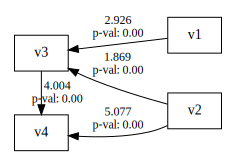

In [114]:
# パス図
g = semopy.semplot(model, filename="/tmp/path_diagram.png", plot_covs=True)

with g.subgraph() as s:
    s.attr(rank = "same")
    s.node("v3")
    s.node("v4")

with g.subgraph() as s:
    s.attr(rank = "same")
    s.node("v1")
    s.node("v2")
    
g.attr(rankdir = "RL")
g.attr(pad = "0.2") # padding
g

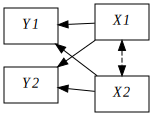

In [63]:
import graphviz

graphviz.Source("""
digraph g {
    graph [rankdir = RL];
    node [shape = rectangle];
        X1 [label=<<I>X<SUB>1</SUB></I>>]
        X2 [label=<<I>X<SUB>2</SUB></I>>]
        Y1 [label=<<I>Y<SUB>1</SUB></I>>]
        Y2 [label=<<I>Y<SUB>2</SUB></I>>]
    edge [];
        {X1, X2} -> Y1
        {X1, X2} -> Y2
        X1 -> X2 [dir=both style=dashed label=" "]
        {rank = same; X1; X2;}
}
""")

semopyはRの`{lavaan}`とは異なり、外生変数間の共変関係や分散を推定してくれない（そのため自由度が上がり適合度系の指標がおかしくなったりする）

なので

```
x1 ~~ x2
x1 ~~ x1
x2 ~~ x2
```

も指定してやる必要がある


In [52]:
import semopy
import numpy as np
import pandas as pd

# データ生成
n = 1000
np.random.seed(0)
x1 = np.random.uniform(size=n)
x2 = np.random.uniform(size=n)
e1 = np.random.normal(size=n)
e2 = np.random.normal(size=n)
y1 = 10 + 3 * x1 + 5 * x2 + e1
y2 = 5 + 10 * x1 + 15 * x2 + e2
data = pd.DataFrame(dict(y1=y1, y2=y2, x1=x1, x2=x2))

# モデルを構築
desc = """
y1 ~ x1 + x2
y2 ~ x1 + x2
x1 ~~ x2
x1 ~~ x1
x2 ~~ x2
"""
model = semopy.Model(desc)
model.fit(data)
model.inspect(std_est=True)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,y1,~,x1,2.925450,0.436100,0.105792,27.652921,0.000000
1,y1,~,x2,4.869091,0.746496,0.102865,47.334923,0.000000
2,y2,~,x1,9.907971,0.528034,0.106670,92.884242,0.000000
3,y2,~,x2,15.085703,0.826853,0.103719,145.448189,0.000000
4,x1,~~,x2,0.000515,0.005930,0.002748,0.187510,0.851261
5,x1,~~,x1,0.084481,1.000000,0.003778,22.360680,0.000000
6,x2,~~,x2,0.089357,1.000000,0.003996,22.360680,0.000000
7,y1,~~,y1,0.945464,0.248700,0.042282,22.360680,0.000000
8,y2,~~,y2,0.961229,0.032317,0.042987,22.360680,0.000000


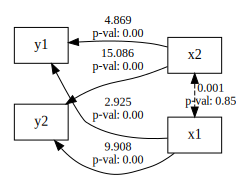

In [53]:
# パス図
g = semopy.semplot(model, filename="/tmp/path_diagram.png", plot_covs=True)

# rank = same
with g.subgraph() as s:
    s.attr(rank = "same")
    s.node("x1")
    s.node("x2")

g.attr(rankdir = "RL")
g.attr(pad = "0.2") # padding
g

In [54]:
print(g.source)

digraph G {
	overlap=scale splines=true
	edge [fontsize=12]
	node [fillcolor="#cae6df" shape=circle style=filled]
	node [shape=box style=""]
	y1 [label=y1]
	y2 [label=y2]
	x1 [label=x1]
	x2 [label=x2]
	x1 -> y1 [label="2.925\np-val: 0.00"]
	x2 -> y1 [label="4.869\np-val: 0.00"]
	x1 -> y2 [label="9.908\np-val: 0.00"]
	x2 -> y2 [label="15.086\np-val: 0.00"]
	x2 -> x1 [label="0.001\np-val: 0.85" dir=both style=dashed]
	{
		rank=same
		x1
		x2
	}
	rankdir=RL
	pad=0.2
}



### 考察

上記x1,x2は共変関係は考えるが一方向への関係（例えばx2→x1）は考えていない。そのため、もしデータ側にそういう関係があった場合は欠落変数バイアスが発生する様子。

## 非逐次モデル

**非逐次モデル**（non-recursive model）は単方向の矢印だけをたどって起点となった元の変数に戻ることができるモデル、つまり、内生変数間の双方向のパスがあるモデルである。

非逐次モデルの推定には、双方向のパスを仮定する2つの変数のうち、一方の変数にだけ直接影響を与え、残りの変数には影響を与えない外生変数である**道具的変数**（instrumental variable）が必要である。

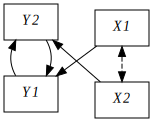

In [87]:
import graphviz

graphviz.Source("""
digraph g {
    graph [rankdir = RL];
    node [shape = rectangle];
        X1 [label=<<I>X<SUB>1</SUB></I>>]
        X2 [label=<<I>X<SUB>2</SUB></I>>]
        Y1 [label=<<I>Y<SUB>1</SUB></I>>]
        Y2 [label=<<I>Y<SUB>2</SUB></I>>]
    edge [];    
        X1 -> X2 [dir=both style=dashed label=" "]
        { rank = same; X1; X2 }
        { rank = same; Y1; Y2 }
        X1 -> Y1 -> Y2
        X2 -> Y2 -> Y1
}
""")

## 参考文献

パス解析

- 豊田秀樹（1998）『共分散構造分析 入門編』
- 豊田秀樹（2014）『共分散構造分析 R編』

非逐次モデル

- [Williams, R (2015) Nonrecursive Models – Highlights](https://www3.nd.edu/~rwilliam/stats2/l93.pdf)
  - 2SLSで解いている